<a href="https://colab.research.google.com/github/rahool010/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# import neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Hotel Booking Analysis/Hotel Bookings.csv")
df.head()   # shows first 5 observations by default

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.tail()  # shows last 5 observations by default

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
# check the shape of the dataset
print(df.shape)

(119390, 32)


In [6]:
# check the datatypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# data summary
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


The dataset has 32 features (Continuous and Categorical)  with one identified dependant variable which is 'is_canceled'

In [8]:
# describe() method show statistical data like count,min,max,mean,etc for numerical values of dataframe
# so let's now get the summary for categorical values 
#df.describe(include='object').transpose()

In [9]:
# check missing values in the dataset
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

# Data Cleaning and Preparation

In [10]:
# check the count and percentage of null values
null_df=pd.DataFrame({'null_values':df.isnull().sum(),
                  'null_percent':df.isnull().sum()/df.shape[0]*100})
null_df=null_df[null_df['null_values']>0]
null_df

,null_values,null_percent
children,4,0.003350
country,488,0.408744
agent,16340,13.686238
company,112593,94.306893


In [11]:
# company has a lot of null values so it is deleted and  
# reservation_status will not be relevant for our data analysis purpose, so drop this columns.

df = df.drop(['company','reservation_status_date'], axis=1)
print(df.shape)

(119390, 30)


In [12]:
# children country and agent has less than 20% missing values
# so missing values can be imputed using global constants
# fill null values in agent with 0 because it can be assumed that booking was without agent
# same with children and fill null values in country with global constant ('Unknown')

null_replace = {'children' : 0, 'country' : 'Unknown', 'agent': 0}

df = df.fillna(null_replace)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [13]:
# after handling the missing values
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [14]:
# let's create a new column to indicate
# 0 - reserved room and assigned room is different
# 1 - reserved room and assigned room is same
df['same_room'] = np.where(df['reserved_room_type']==df['assigned_room_type'],'1', '0') 

In [15]:
df['same_room'].value_counts()

1    104473
0     14917
Name: same_room, dtype: int64

In [16]:
# create a list of categorical and numerical columns 
cat_cols=["hotel","arrival_date_month","meal","country","market_segment","is_canceled",
          "distribution_channel","reserved_room_type","assigned_room_type","deposit_type",
          "customer_type","reservation_status","is_repeated_guest","same_room"]
print("Categorical columns:",cat_cols)

num_cols = [col for col in df.columns if col not in cat_cols]
print("Numerical columns:",num_cols)

Categorical columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'is_canceled', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'is_repeated_guest', 'same_room']
Numerical columns: ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [17]:
#plt.figure(figsize=(16,9))
#sns.heatmap(data.isnull())
#plt.show()

# **Exploratory Analysis and Visualization**

## Hotel type, meal and cancellation

In [18]:
pd.DataFrame(df.groupby('hotel')['is_canceled'].mean()*100)

,is_canceled
hotel,
City Hotel,41.726963
Resort Hotel,27.763355


non refundable deposit has the highest cancellation rate among all deposit types

## Distribution Channel & Market Segment more likely to cancel

In [19]:
pd.crosstab([df['hotel'],df['distribution_channel']], df['is_canceled'], normalize = 'index')

is_canceled                               0         1
hotel        distribution_channel                    
City Hotel   Corporate             0.769366  0.230634
             Direct                0.818289  0.181711
             GDS                   0.808290  0.191710
             TA/TO                 0.549743  0.450257
             Undefined             0.000000  1.000000
Resort Hotel Corporate             0.789538  0.210462
             Direct                0.831532  0.168468
             TA/TO                 0.685082  0.314918
             Undefined             1.000000  0.000000

Travel Agent / Tour Operators has the highest cancellation rate among all the distribution channel for both the hotel types whereas direct has the lowest cancellation rate for both the hotel types.

In [20]:
pd.crosstab(df['market_segment'], df['is_canceled'], normalize = 'index')

is_canceled,0,1
market_segment,,
Aviation,0.780591,0.219409
Complementary,0.869448,0.130552
Corporate,0.812653,0.187347
Direct,0.846581,0.153419
Groups,0.389380,0.610620
Offline TA/TO,0.656840,0.343160
Online TA,0.632789,0.367211
Undefined,0.000000,1.000000


We see here in both the types of hotel group market segment has the higher cancellation rate followed by Online TA and Offline TA/TO which has almost similar number of cancellation rate. Direct booking has the lowest cancellation rate (we exclude complimentary since it's complimentary).

## Visualizations

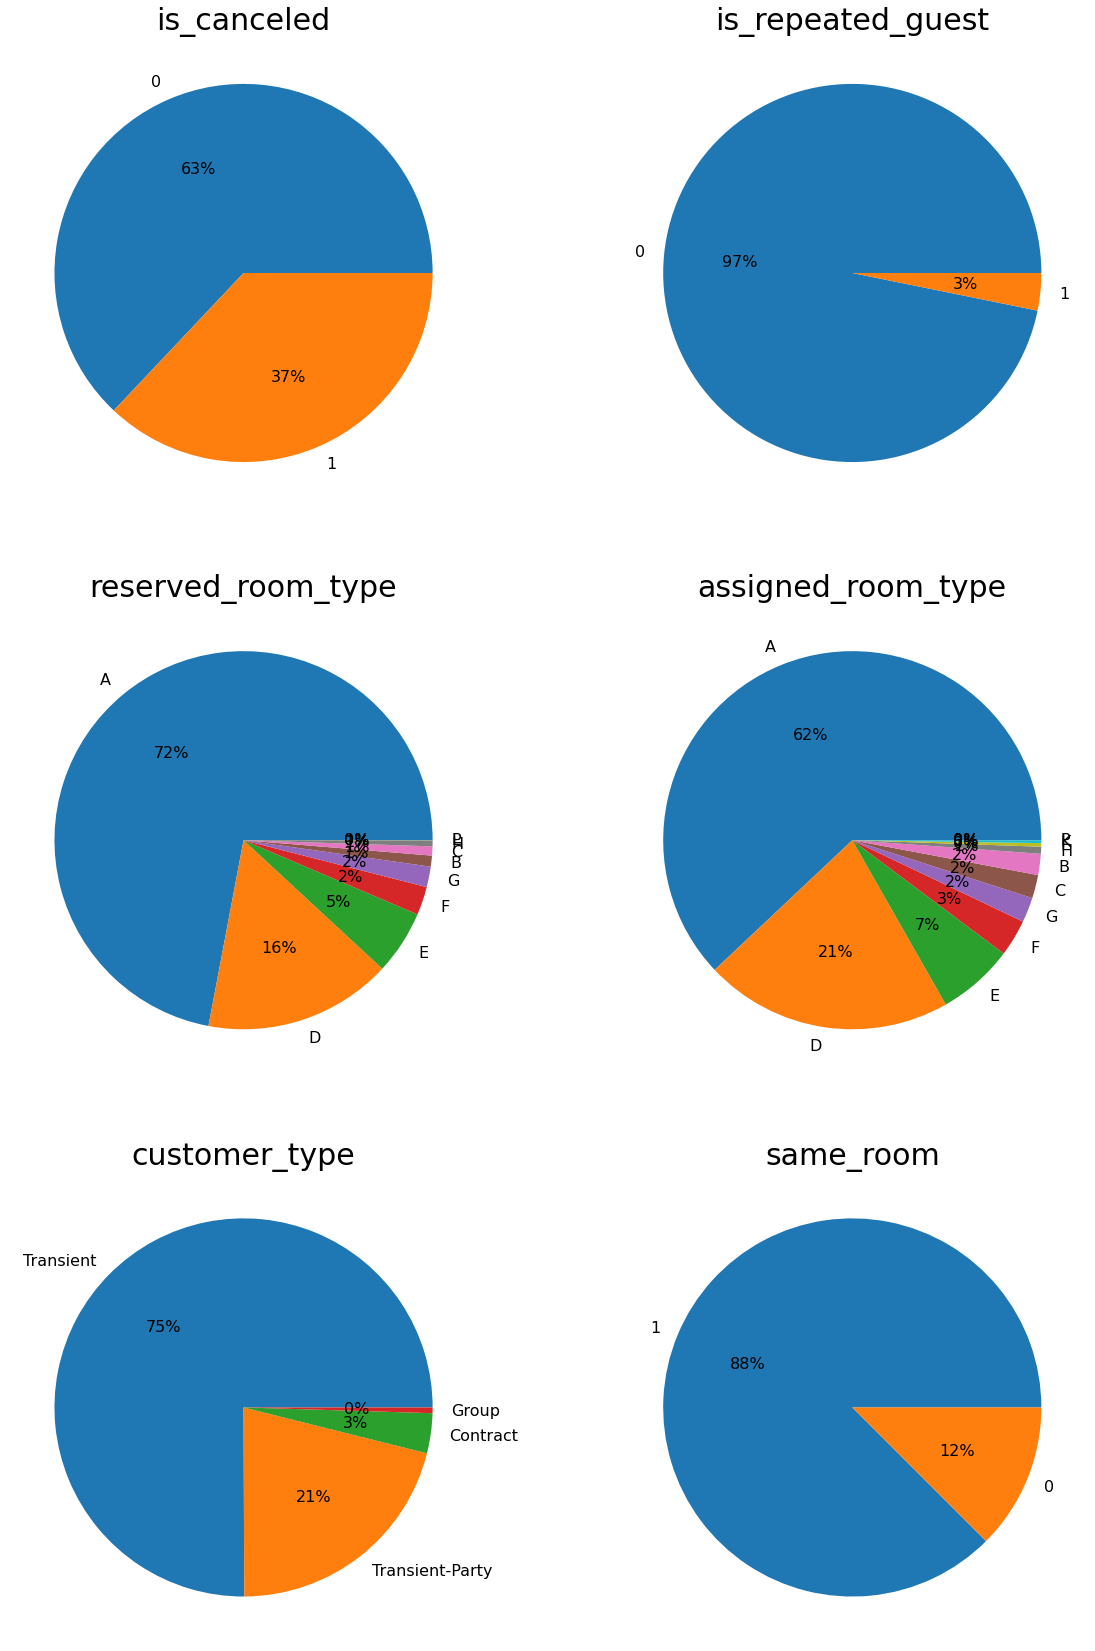

In [21]:
cat_cols1 = ['is_canceled','is_repeated_guest','reserved_room_type','assigned_room_type',
             'customer_type','same_room']
#labels = df[col].value_counts().index.tolist()
plt.figure(figsize=(20,40))
for i, col in enumerate(df[cat_cols1]):
    plt.subplot(4,2,i+1)
    df[col].value_counts().plot.pie(autopct='%0.0f%%',
                                   fontsize=16)
    plt.ylabel('')
    plt.title(col,fontsize=30)
plt.show()

Conclusions:\
1) 63% bookings were done and 37% bookings were cancelled.\
2) Only 3% of guests are repeated.\
3) 72% guests book room type A but only 62% guests were assigned to the room type A.\
4) 75% customers are transient. These are the solo travellers.\
5) 88% guests were assigned the same room.\

# **What is the cancellation rate of both the types of hotels?**

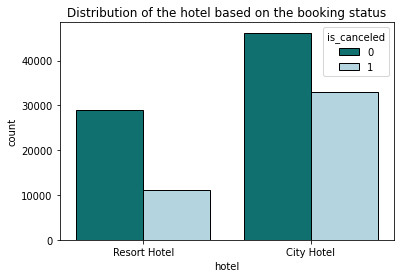

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(df['hotel'], data = df, hue='is_canceled',
              palette = ['teal','lightblue'], edgecolor='k');
plt.title("Distribution of the hotel based on the booking status")
plt.show()

# Which was the mostly booked accommodation type?

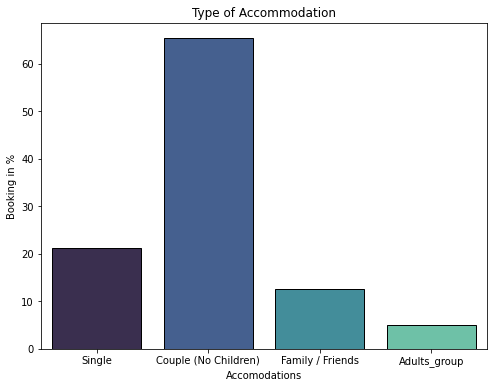

In [23]:
#For further analysis, Select only those booking which did not get cancelled.
df_not_canceled = df[df['is_canceled'] == 0]

# Select single, couple, adults and family
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
adults = df_not_canceled[(df_not_canceled.adults>2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]

# create the list of Category names and its total percentage
#names = ['Single', 'Couple (No Children)', 'Family / Friends', 'Adults_group']
#count = [single.shape[0],couple.shape[0], family.shape[0], adults.shape[0]]
#count_percent = [x/df_not_canceled.shape[0]*100 for x in count]
names = ['Single', 'Couple (No Children)', 'Family / Friends', 'Adults_group']
count = [single.shape[0],couple.shape[0], family.shape[0],adults.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]



plt.figure(figsize=(8,6))
sns.barplot(x=names, y=count_percent, data=df, 
            palette='mako', edgecolor='k')
plt.title("Type of Accommodation")
plt.xlabel('Accomodations')
plt.ylabel('Booking in %')
plt.show()

The trend shows that the majority of reservations are for couples.\
The second highest trend is for single person. It can be assumed that these are the solo travelers.


# **Where do the guests come from?**

In [24]:
country_booking = df['country'].value_counts(normalize=True).rename_axis('country').reset_index(name='Percentage')
country_booking.head(10)

,country,Percentage
0,PRT,0.406986
1,GBR,0.101591
2,FRA,0.087235
3,ESP,0.071765
4,DEU,0.061035
5,ITA,0.031544
6,IRL,0.028269
7,BEL,0.019616
8,BRA,0.018628
9,NLD,0.017623


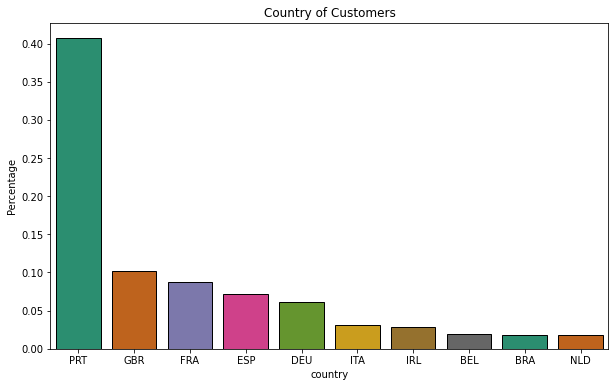

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='country', y='Percentage', data=country_booking.head(10),
           palette = 'Dark2', edgecolor='k')
plt.title('Country of Customers')
plt.show()

•	Graph shows that the majority of reservations are made for Portugal followed by Great Britain and France. However, there is big drop to the most popular country.\
•	The bar slowly decreases after the second most popular country.


# **Which year and month has the maximum number of bookings?**

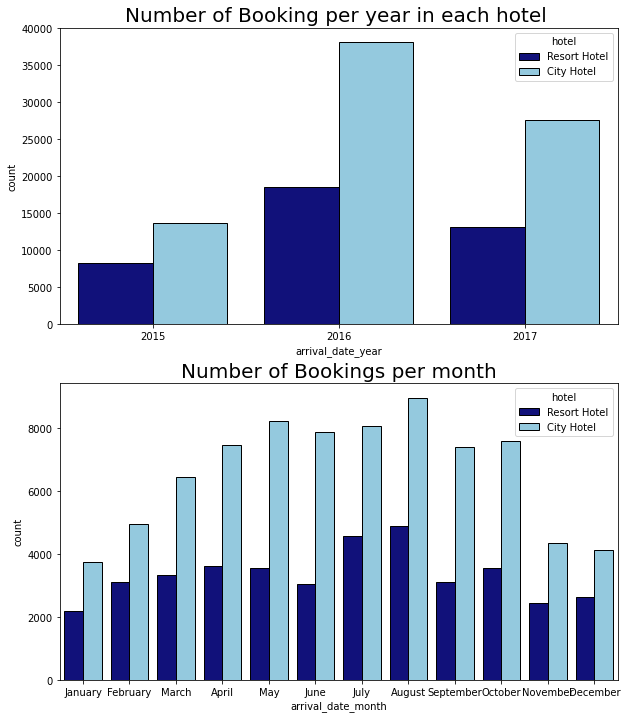

In [26]:
# arrival per year and month
plt.figure(figsize=(10, 12))
plt.subplot(2, 1, 1)
sns.countplot(x='arrival_date_year',hue='hotel', data=df,
              palette=['darkblue','skyblue'], edgecolor='k')
plt.title("Number of Booking per year in each hotel ", size=20)

months=['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August','September', 'October', 'November', 'December']
plt.subplot(2, 1, 2)
sns.countplot(x = 'arrival_date_month', hue='hotel', data=df, order=months,
              palette=['darkblue','skyblue'], edgecolor='k')
plt.title('Number of Bookings per month', size=20)
#plt.subplots_adjust(right=1.7)

plt.show()

We can see most of the bookings were in the year 2016 and bookings were done in City hotel
Most bookings were done in the month of May,June, July, August.
It is clear that August, July and May are the most occupied months in case of both City and Resort Hotels

# **Which nationals make the highest number of reservations?**

In [27]:
# Create data of  top 10 countries
df_prt = df[df['country'] == 'PRT']
df_gbr = df[df['country'] == 'GBR']
df_fra = df[df['country'] == 'FRA']
df_esp = df[df['country'] == 'ESP']
df_deu = df[df['country'] == 'DEU']
df_ita = df[df['country'] == 'ITA']
df_irl = df[df['country'] == 'IRL']
df_bel = df[df['country'] == 'BEL']
df_bra = df[df['country'] == 'BRA']
df_nld = df[df['country'] == 'NLD']

# Create a dataset by combining data of top 10 countries
df_top10 = pd.concat([df_fra, df_gbr, df_prt, df_deu, df_esp,
                        df_ita,df_irl, df_bel, df_bra, df_nld]).reset_index(drop=True)

In [28]:
reservations = df_top10.groupby(['country','reservation_status']).lead_time.count()
print(reservations)

country  reservation_status
BEL      Canceled                464
         Check-Out              1868
         No-Show                  10
BRA      Canceled                799
         Check-Out              1394
         No-Show                  31
DEU      Canceled               1205
         Check-Out              6069
         No-Show                  13
ESP      Canceled               2145
         Check-Out              6391
         No-Show                  32
FRA      Canceled               1902
         Check-Out              8481
         No-Show                  32
GBR      Canceled               2412
         Check-Out              9676
         No-Show                  41
IRL      Canceled                825
         Check-Out              2543
         No-Show                   7
ITA      Canceled               1315
         Check-Out              2433
         No-Show                  18
NLD      Canceled                382
         Check-Out              1717
         N

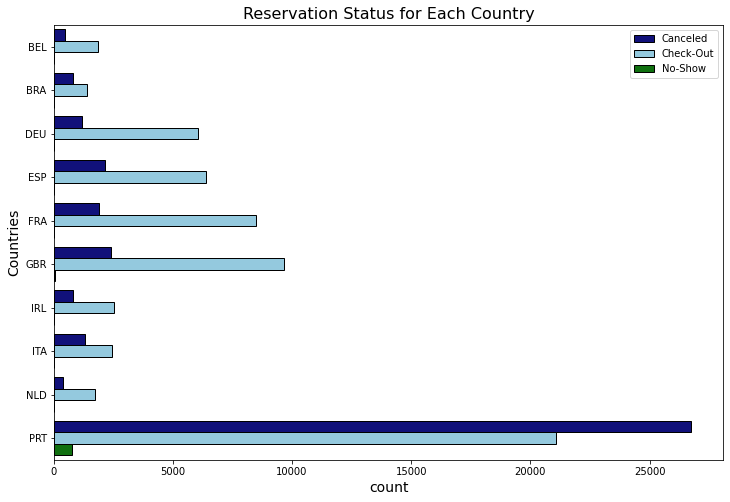

In [29]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'lead_time', y = 'country', hue = 'reservation_status',
            data = reservations.reset_index(), palette = ['darkblue','skyblue','green'],
            edgecolor='k')  # icefire, 
plt.title('Reservation Status for Each Country', fontsize = 16)
plt.xlabel('count', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
L=plt.legend()
plt.show()

The above graph depicts that Portugal has the most number of reservations, but it also has more cancelations than check-outs.\
Portuguese nationals make the highest number of reservations. But the number of cancellation is higher than the number of checkouts

# **Which month has maximum number of special requests each year?**

In [30]:
special_request = df[df['total_of_special_requests'] != 0][['arrival_date_year','arrival_date_month','total_of_special_requests']]
special_request

,arrival_date_year,arrival_date_month,total_of_special_requests
4,2015,July,1
5,2015,July,1
7,2015,July,1
8,2015,July,1
12,2015,July,3
...,...,...,...
119380,2017,August,1
119384,2017,August,2
119386,2017,August,2
119387,2017,August,4


In [31]:
special_req_2015 = df[(df['arrival_date_year'] == 2015) & (df['total_of_special_requests'] != 0)][['arrival_date_month','total_of_special_requests']]
special_req_2015

,arrival_date_month,total_of_special_requests
4,July,1
5,July,1
7,July,1
8,July,1
12,July,3
...,...,...
82645,December,2
82650,December,2
82732,December,1
82958,August,1


In [32]:
# Sorting months in month wise
months = special_req_2015.arrival_date_month.unique()
special_req_2015['arrival_date_month'] = pd.Categorical(special_req_2015['arrival_date_month'], categories=months, ordered=True)

In [33]:
month_wise_special_req_2015 = special_req_2015.groupby('arrival_date_month')['total_of_special_requests'].sum().reset_index()
month_wise_special_req_2015

,arrival_date_month,total_of_special_requests
0,July,1226
1,August,2188
2,September,1869
3,October,1953
4,November,950
5,December,1392


In [34]:
special_req_2016 = df[(df['arrival_date_year'] == 2016) & (df['total_of_special_requests'] != 0)][['arrival_date_month','total_of_special_requests']]
special_req_2016.head()

,arrival_date_month,total_of_special_requests
3738,January,1
3739,January,1
3740,January,1
3741,January,2
3743,January,1


In [35]:
# Sorting months
months = special_req_2016['arrival_date_month'].unique()
special_req_2016['arrival_date_month'] = pd.Categorical(special_req_2016['arrival_date_month'], categories=months, ordered=True)

In [36]:
month_wise_special_req_2016 = special_req_2016.groupby('arrival_date_month')['total_of_special_requests'].sum().reset_index()
month_wise_special_req_2016

,arrival_date_month,total_of_special_requests
0,January,988
1,February,1622
2,March,2079
3,April,2223
4,May,2342
5,June,2633
6,July,3039
7,August,3454
8,September,3399
9,October,3563


In [37]:
special_req_2017 = df[(df['arrival_date_year'] == 2017) & (df['total_of_special_requests'] != 0)][['arrival_date_month','total_of_special_requests']]
#special_request_of_2017.head()

In [38]:
# Sorting months
months = special_req_2017['arrival_date_month'].unique()
special_req_2017['arrival_date_month'] = pd.Categorical(special_req_2017['arrival_date_month'], categories=months, ordered=True)

In [39]:
month_wise_special_req_2017 = special_req_2017.groupby('arrival_date_month')['total_of_special_requests'].sum().reset_index()
month_wise_special_req_2017

,arrival_date_month,total_of_special_requests
0,January,2258
1,February,2619
2,March,2793
3,April,3560
4,May,3938
5,June,3536
6,July,4240
7,August,4581


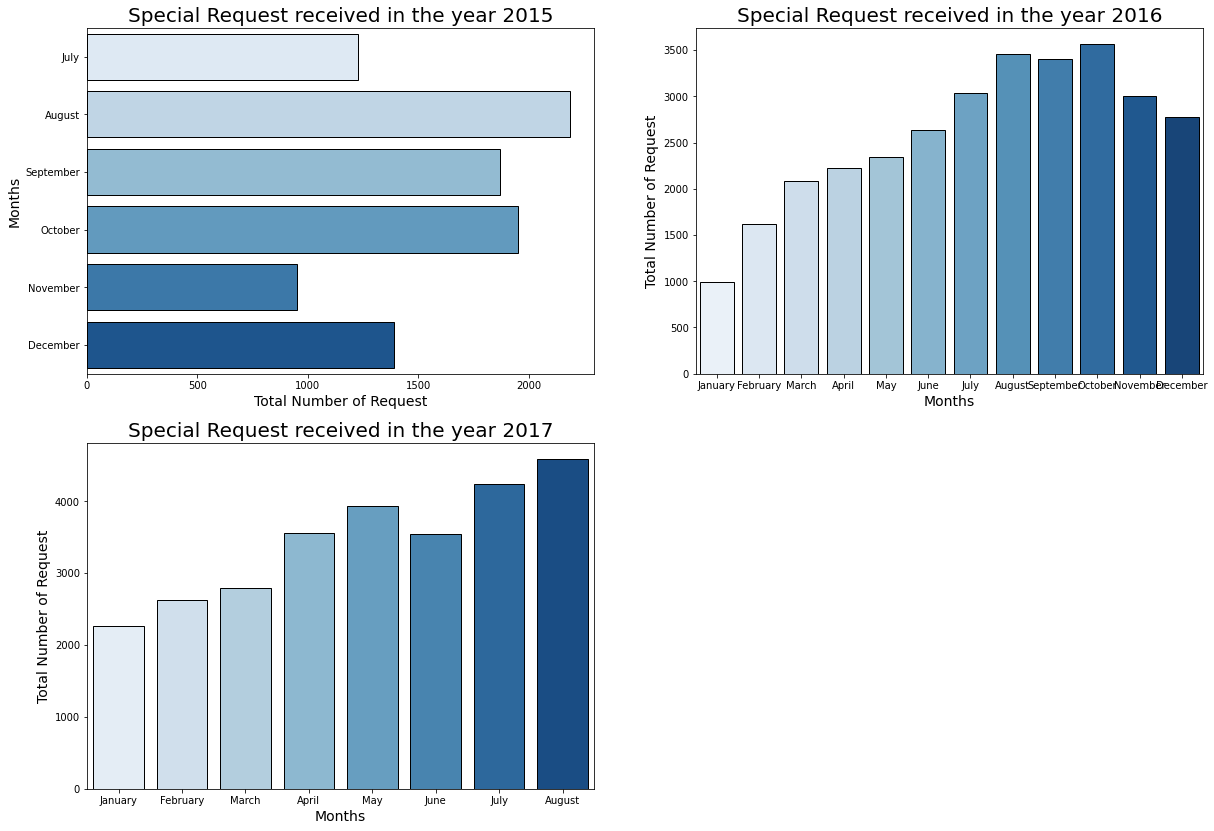

In [40]:
plt.figure(figsize=(20,14))

plt.subplot(2,2,1)
sns.barplot(y='arrival_date_month', x='total_of_special_requests',
           data=month_wise_special_req_2015, palette='Blues', 
            edgecolor='k')
plt.title('Special Request received in the year 2015', fontsize = 20)
plt.ylabel('Months', fontsize = 14)
plt.xlabel('Total Number of Request', fontsize = 14)

plt.subplot(2,2,2)
sns.barplot(x='arrival_date_month', y='total_of_special_requests',
           data=month_wise_special_req_2016, palette='Blues',
            edgecolor='k')
plt.title('Special Request received in the year 2016', fontsize = 20)
plt.xlabel('Months', fontsize = 14)
plt.ylabel('Total Number of Request', fontsize = 14)

plt.subplot(2,2,3)
sns.barplot(x='arrival_date_month', y='total_of_special_requests',
           data=month_wise_special_req_2017, palette='Blues',
            edgecolor='k')
plt.title('Special Request received in the year 2017', fontsize = 20)
plt.xlabel('Months', fontsize = 14)
plt.ylabel('Total Number of Request', fontsize = 14)

plt.show()

•	From the above graphs, it can be observed that in the year 2015, hotels received maximum number of special requests in the month of August followed by October and September \
•	In the year 2016, October has the highest number of special request followed by August and September.\
•	In the year 2017, August, July and May are the top 3 months with maximum special requests.\
•	One thing to notice here is that only 2016 has complete information, whereas 2015 and 2017 consists information of only few months.


# What are the deposit types and cancellations for market segment?

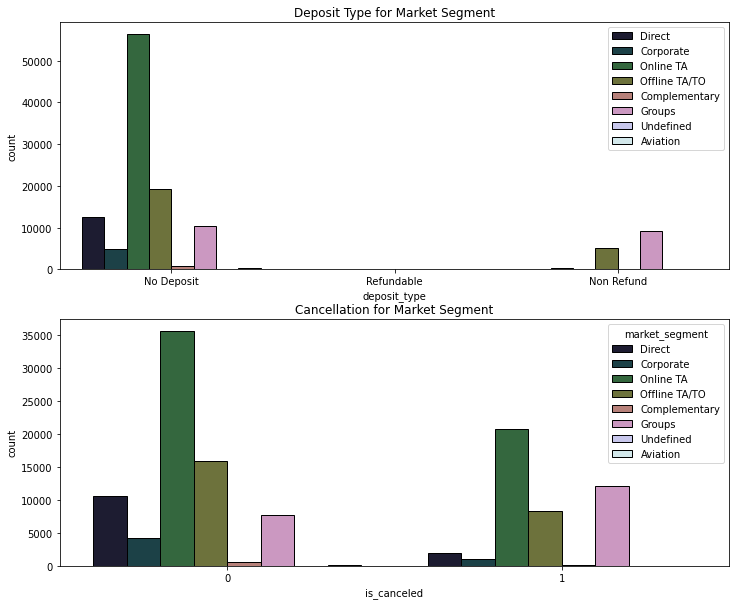

In [41]:
# What are the deposit types for market segments?
# Which type of market segment has highest cancellation?
plt.figure(figsize=(12,10))
plt.subplot(211)
sns.countplot(data=df,x='deposit_type',hue='market_segment',
             palette='cubehelix', edgecolor='k')
plt.title('Deposit Type for Market Segment')
plt.legend(loc = 1)
plt.subplot(212)
sns.countplot(data=df,x='is_canceled',hue='market_segment',
             palette='cubehelix', edgecolor='k')
plt.title('Cancellation for Market Segment')
plt.show()

Deposit type for market segment:\
•	Online TA has the highest booking with No Deposit. Whereas Groups and Offline TA/TO has Non Refund booking.\
•	Now a days it is easy to book a hotel using Online TA, most of the Online TA offers the customers without deposit facility.\

Cancellation for market segment:\
•	Online TA has the highest booking cancellation. Most of the Online TA provides the customers facility to cancel booking without any charges.



# Which market segment has the lowest number of days on waiting list?

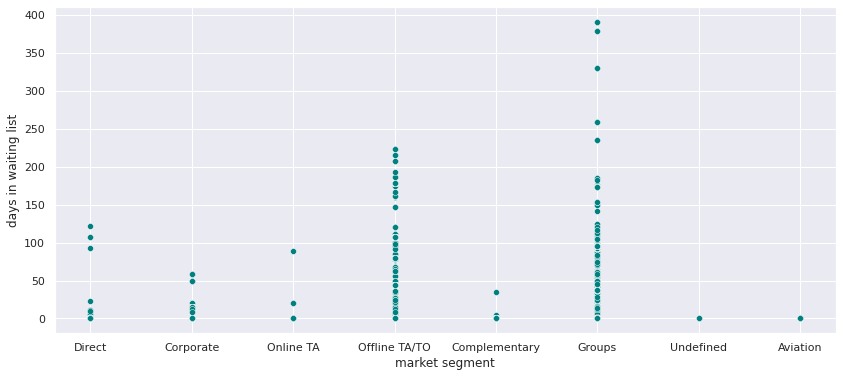

In [42]:
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.scatterplot(df['market_segment'],df['days_in_waiting_list'],
               color='teal')
plt.xlabel('market segment')
plt.ylabel('days in waiting list')
plt.show()

* Aviation industry has the minimum number of days on waiting list because when a flight is landed, the flight crew needs to be accommodated immediately.
Hence, the working staff does not entertain those hotels which fails to provide them immediate accommodation.
* Customers booking through Groups and Offline TA/TO segments has the highest days on the waiting list.

# How much do customers pay for a room per night?

In [43]:
df2=df[df['is_canceled']==0]

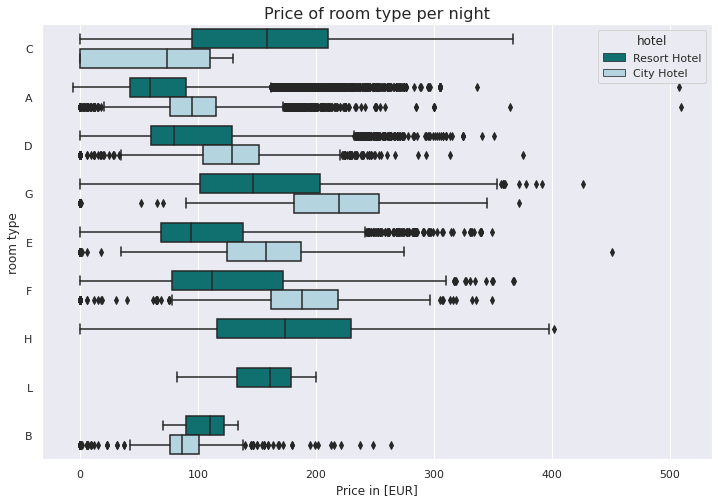

In [44]:
plt.figure(figsize=(12,8))
sns.boxplot(y='reserved_room_type',x='adr',data=df2,hue='hotel',
            palette=['teal','lightblue']) # adr stands for prize of the room  
plt.title('Price of room type per night', fontsize=16)
plt.ylabel('room type')
plt.xlabel('Price in [EUR]' )
plt.show()

•	The above figure shows the average price per room, depending on its type and the standard deviation.\
•	From the above graph it is clear that the Room type A has the highest outlier i.e highest price that is 500 euro.\
•	Whereas in City Hotel prices are high for Room type G.


# What are the prices per month for both the types of hotels?

In [45]:
df_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
df_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

resort_hotel = df_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=df_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

merge_hotel = resort_hotel.merge(city_hotel, on='arrival_date_month')
merge_hotel.columns = ['months', 'resort_price', 'city_price']
merge_hotel

,months,resort_price,city_price
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


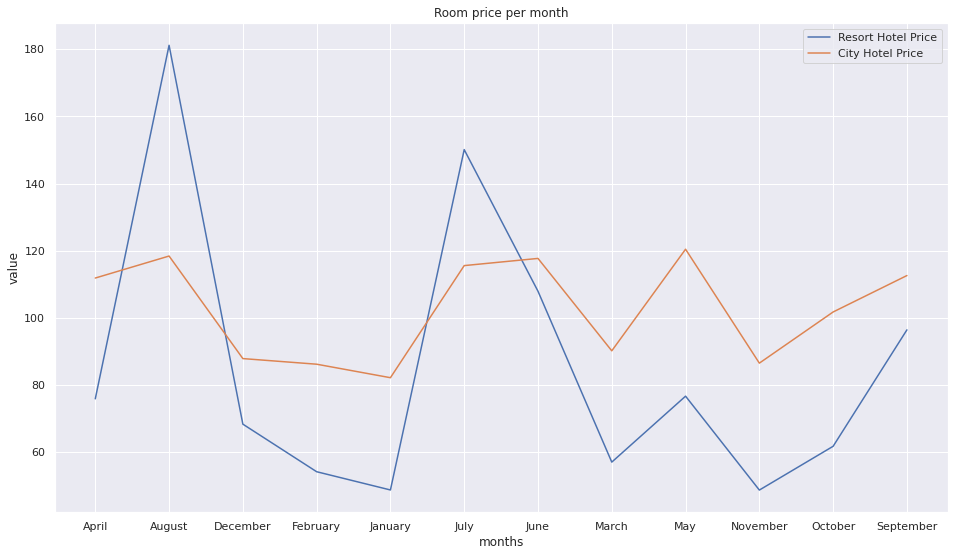

In [46]:
plt.figure(figsize = (16, 9))
sns.set(style='darkgrid')
sns.lineplot(data = merge_hotel, x = 'months', y = 'resort_price',label='Resort Hotel Price')
sns.lineplot(data = merge_hotel, x = 'months', y = 'city_price',label='City Hotel Price')
plt.title("Room price per month")
plt.xlabel('months')
plt.ylabel('value')
plt.legend()
plt.show()

*	The above graph clearly shows that the prices in the Resort Hotel are much higher during the months of August and July.
*	Whereas the prices of the City Hotel varies less and is most expensive during May, June, July and August.
*	Prices of the Resort Hotel are much higher. It seems that it is definitely the case since the Resort Hotels specialize in that. Prices of the City Hotel do not fluctuate that much.


## Correlations / Correlogram

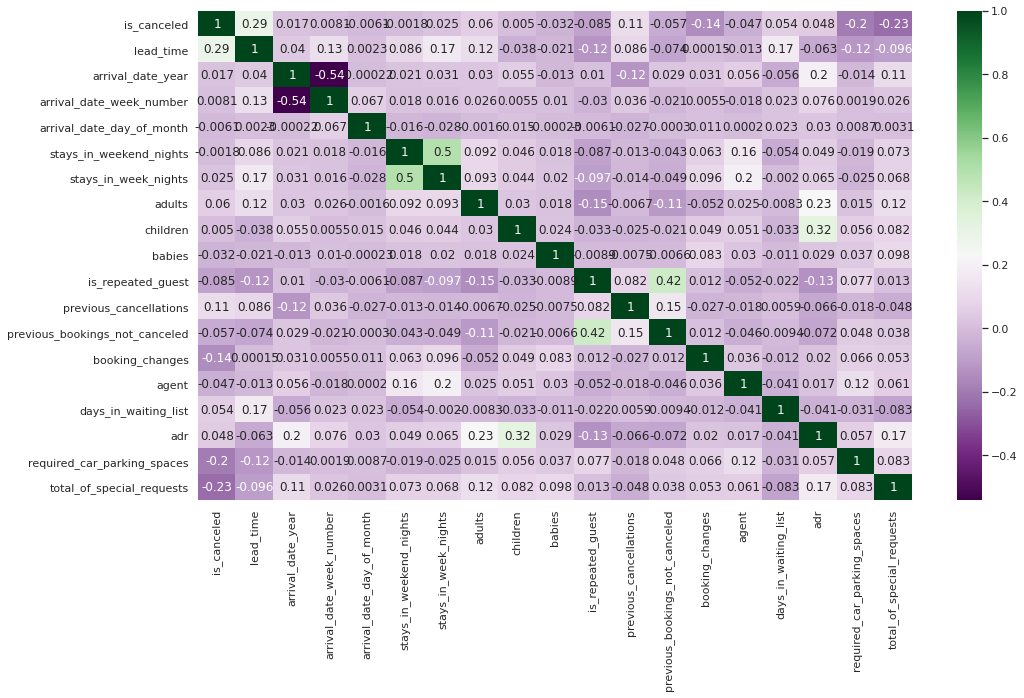

In [47]:
# finding the relations between the variables
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap='PRGn',annot=True)
plt.show()

From the above heatmap, we observe the following:

*	We see that is_canceled is correlated by 29% lead_time is the only feature that has positive correlation with is_canceled feature.
*	Most of the variables have an insignificant level of correlation with the is_canceled feature.
*	adr and children are positively correlated by 32%.
*	total_of_special_requests and required_car_parking_spaces have negative correlation with is_canceled feature.
